In [1]:
#Import packages
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#accessing directory
train = os.path.join('web/training_set')
test = os.path.join('web/test_set')

# directory with our training pictures
train_saree = os.path.join(train, 'saree')  
train_shirt = os.path.join(train, 'shirt')
train_tshirt = os.path.join(train, 'tshirt')

# directory with our test pictures
test_saree = os.path.join(test, 'saree')  
test_shirt = os.path.join(test, 'shirt')
test_tshirt = os.path.join(test, 'tshirt')

In [3]:
#over viewing details about dataset
saree_train = len(os.listdir(train_saree))
shirt_train = len(os.listdir(train_shirt))
tshirt_train = len(os.listdir(train_shirt))

saree_test = len(os.listdir(test_saree))
shirt_test = len(os.listdir(test_shirt))
tshirt_test = len(os.listdir(test_shirt))

total_train = saree_train + shirt_train + tshirt_train
total_val = saree_test + shirt_test + tshirt_test

print('total training saree images:', saree_train)
print('total training shirt images:', shirt_train)
print('total training tshirt images:', tshirt_train,'\n')

print('total test saree images:', saree_test)
print('total test shirt images:', shirt_test)
print('total test tshirt images:', tshirt_test,'\n')

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training saree images: 100
total training shirt images: 100
total training tshirt images: 100 

total test saree images: 20
total test shirt images: 20
total test tshirt images: 20 

Total training images: 300
Total validation images: 60


In [4]:
#creating a list of location
saree = 'web/training_set/saree/*.jpg'
shirt = 'web/training_set/shirt/*.jpg'
tshirt = 'web/training_set/tshirt/*.jpg'
file_loc = [saree,shirt,tshirt]

In [5]:
# getting image using imread and then applying augmentation
for loc in file_loc:
    images = glob.glob(loc)
    print('Fetching pics from : ',loc)
    path=input('Enter the path where to save the image in form of directory/img- : ')

    i=101
    for image in images:
        img = cv2.imread(image)
        
        #apply rotating +30
        h,w =img.shape[:2]
        center=(w//2,h//2)
        M= cv2.getRotationMatrix2D(center,30,0.5)
        rotated_img = cv2.warpAffine(img,M,(w,h))
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',rotated_img)
        i=i+1
        
        #applying rotating by -30
        M= cv2.getRotationMatrix2D(center,-30,0.5)
        rotated_img = cv2.warpAffine(img,M,(w,h))
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',rotated_img)
        i=i+1
        
        #increasing brightness
        matrix = np.ones(img.shape, dtype='uint8')*75
        brighten = cv2.add(img,matrix)
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',brighten)
        i=i+1

        #decreasing brightness
        matrix = np.ones(img.shape, dtype='uint8')*75
        darken = cv2.subtract(img,matrix)
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',darken)
        i=i+1
        
        # flipping image horizontally
        flph =cv2.flip(img,1)
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',flph)
        i=i+1
        
        #sharpening
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        sharpened_img=cv2.filter2D(img,-1,kernel_sharpening)
        cv2.imwrite('web/training_set/'+str(path)+str(i)+'.jpg',sharpened_img)
        i=i+1

Fetching pics from :  web/training_set/saree/*.jpg
Enter the path where to save the image in form of directory/img- : saree/augment-
Fetching pics from :  web/training_set/shirt/*.jpg
Enter the path where to save the image in form of directory/img- : shirt/augment-
Fetching pics from :  web/training_set/tshirt/*.jpg
Enter the path where to save the image in form of directory/img- : tshirt/augment-


In [6]:
#checking dataset after image augmentation
saree_train = len(os.listdir(train_saree))
shirt_train = len(os.listdir(train_shirt))
tshirt_train = len(os.listdir(train_shirt))

saree_test = len(os.listdir(test_saree))
shirt_test = len(os.listdir(test_shirt))
tshirt_test = len(os.listdir(test_shirt))

total_train = saree_train + shirt_train + tshirt_train
total_val = saree_test + shirt_test + tshirt_test

print('total training saree images:', saree_train)
print('total training shirt images:', shirt_train)
print('total training tshirt images:', tshirt_train,'\n')

print('total test saree images:', saree_test)
print('total test shirt images:', shirt_test)
print('total test tshirt images:', tshirt_test,'\n')

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training saree images: 700
total training shirt images: 700
total training tshirt images: 700 

total test saree images: 20
total test shirt images: 20
total test tshirt images: 20 

Total training images: 2100
Total validation images: 60


In [7]:
# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255)
# Generator for our test data
test_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
batch_size = 20
epochs = 15
IMG_HEIGHT = 300
IMG_WIDTH = 150

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2100 images belonging to 3 classes.


In [10]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 3 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

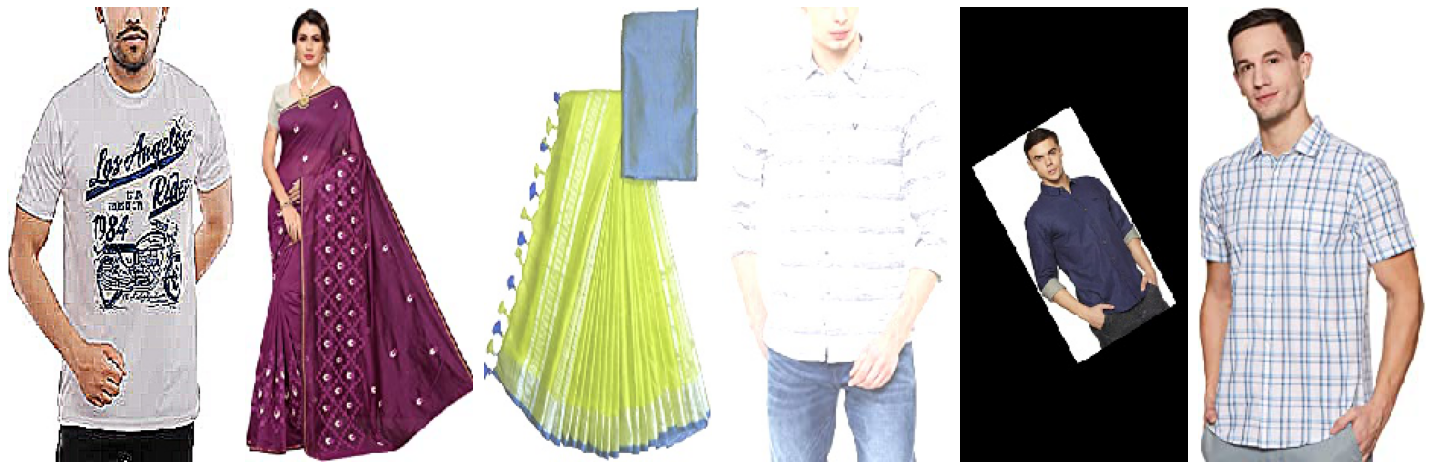

In [13]:
plotImages(sample_training_images[:6])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2),2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D((2,2),2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((2,2),2),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [15]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
#Train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 105 steps, validate for 3 steps
Epoch 1/15
105/105 [==============================] - 46s 437ms/step - loss: 0.7469 - accuracy: 0.6795 - val_loss: 0.3047 - val_accuracy: 0.9000
Epoch 2/15
105/105 [==============================] - 46s 440ms/step - loss: 0.3543 - accuracy: 0.8590 - val_loss: 0.4911 - val_accuracy: 0.8167
Epoch 3/15
105/105 [==============================] - 47s 444ms/step - loss: 0.2845 - accuracy: 0.8919 - val_loss: 0.3029 - val_accuracy: 0.9000
Epoch 4/15
105/105 [==============================] - 42s 403ms/step - loss: 0.1876 - accuracy: 0.9324 - val_loss: 0.3720 - val_accuracy: 0.8833
Epoch 5/15
105/105 [==============================] - 43s 405ms/step - loss: 0.1497 - accuracy: 0.9467 - val_loss: 0.5251 - val_accuracy: 0.8833
Epoch 6/15
105/105 [==============================] - 44s 416ms/step - loss: 0.1282 - accuracy: 0.9500 - va

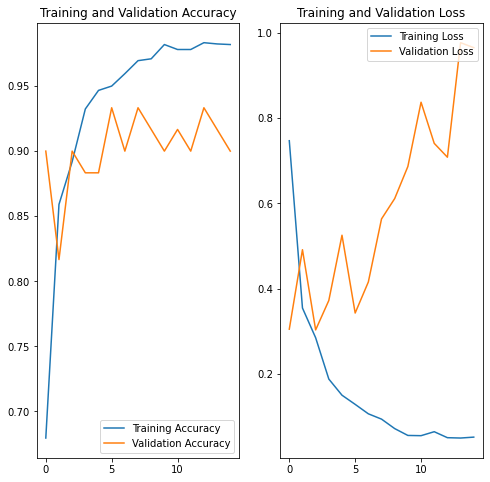

In [17]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save('classification.h5')